# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how= "left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
# Checking the number of mice
len(study_data_complete["Mouse ID"].unique())

249

In [3]:

# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids[0]

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == duplicate_mouse_ids[0]]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mouse_ids)==False] 
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

means = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median() 

variances = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var() 
stds = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std() 

sems= clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem() 

# Assemble the resulting series into a single summary DataFrame.
summaryDict = { 
    "Mean Tumor Volume": means,
    "Median Tumor Volume": medians,
    "Tumor Volume Variance": variances,
    "Tumor Volume Std. Dev.": stds, 
    "Tumor Volume Std. Err.": sems
}
summaryTable = pd.DataFrame(summaryDict)
summaryTable

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2 = clean_study_data_complete.groupby("Drug Regimen").agg( 
    {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
)
df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

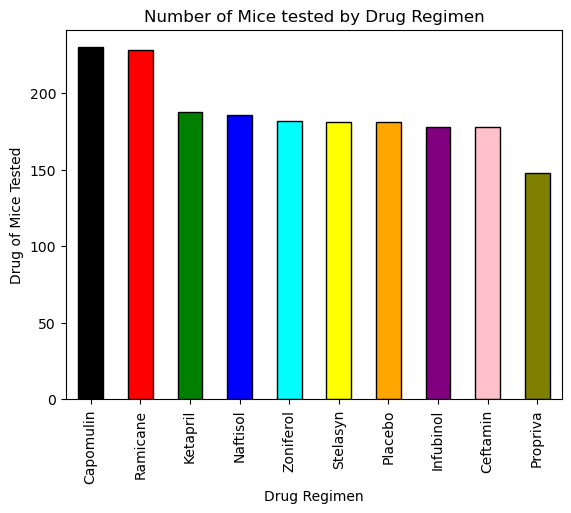

In [9]:
#generate the series for all drug regimens - counts of timepoints(count of occurrences of each drug regimen) 
counts = clean_study_data_complete["Drug Regimen"].value_counts()
counts
#Generate a bar showing the total number of timepoints for all mice tested for each drug regimen using Pandas. 
counts.plot(kind="bar",
            color=["black", "red", "green", "blue", "cyan", "yellow", "orange", "purple", "pink", "olive", "brown"],
            edgecolor="black") 

plt.xlabel("Drug Regimen")
plt.ylabel("Drug of Mice Tested")
plt.title("Number of Mice tested by Drug Regimen") 
plt.xticks(rotation=90)
plt.show()

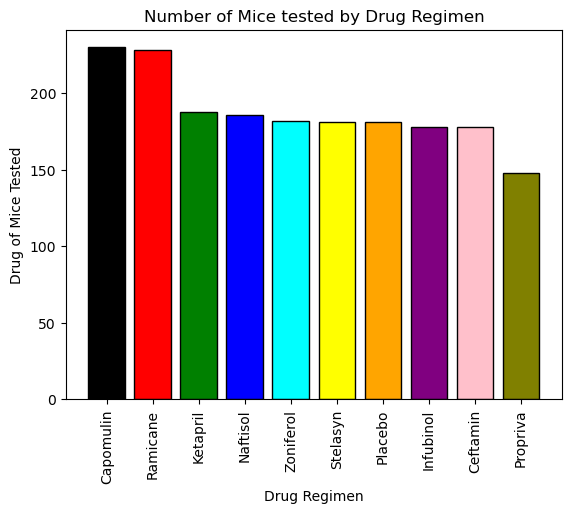

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index.values,
        counts.values,
        color=["black", "red", "green", "blue", "cyan", "yellow", "orange", "purple", "pink", "olive", "brown"],
        edgecolor="black") 
plt.xlabel("Drug Regimen")
plt.ylabel("Drug of Mice Tested")
plt.title("Number of Mice tested by Drug Regimen") 
plt.xticks(rotation=90)
plt.show()

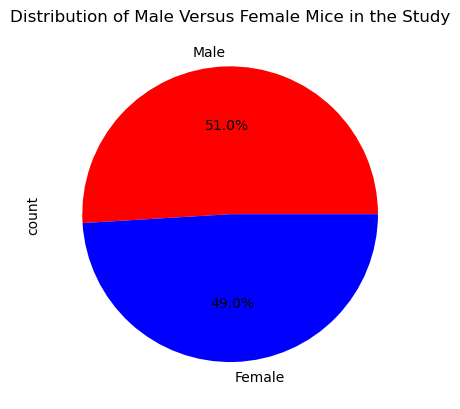

In [11]:
# gender counts
counts = clean_study_data_complete["Sex"].value_counts()
counts 
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts.plot(
    kind="pie",
    autopct="%1.1f%%", 
    colors=["red", "blue"]
)

plt.title("Distribution of Male Versus Female Mice in the Study")
plt.show()

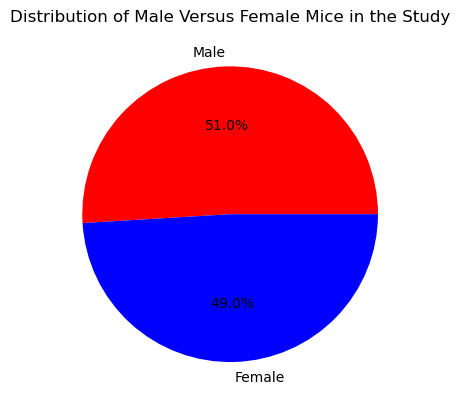

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
    counts.values,
    labels=counts.index.values,
    autopct="%1.1f%%", 
    colors=["red", "blue"]
)

plt.title("Distribution of Male Versus Female Mice in the Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:Start by getting the last (greatest) timepoint for each mouse
#then group by mousse ID to get the max of the Timepoint column 
#clean_study_data_complete.head() 
maxTime = clean_study_data_complete.groupby("Mouse ID")["Timepoint"].max()
# Capomulin, Ramicane, Infubinol, and Ceftamin
#to convert the series to a dataframe, reset the index of the series
maxTime = maxTime.reset_index()
maxTime.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint 
#merged_data = maxTime.merge(clean_study_data_complete, on=["Mouse ID", "Timepoint"], how="left")
#merged_data.head
#clean_study_data_complete.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [14]:
#merge to keep data the max timepoints of each mouse only 
merged_data = maxTime.merge(clean_study_data_complete, on=["Mouse ID", "Timepoint"], how="left")
merged_data.head()        


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Create empty list to fill with tumor vol data (for plotting)
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_vol_list = []
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Put treatments into a list for for loop (and later for plot labels)
for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes by using .loc()
    #info = merged_data.loc[merged_data["Drug Regimen"] == treatment] 
#info
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"] 
    
    # add each series to the empty tumor volume List
    tumor_vol_list.append(final_tumor_vol)
#tumor_vol_list 
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # add subset 

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    if len(outliers) == 0:
        print(f"{treatment}'s potential outliers: None")
    else: 
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output += f"{o}"
        print(output)

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458
Ceftamin's potential outliers: None


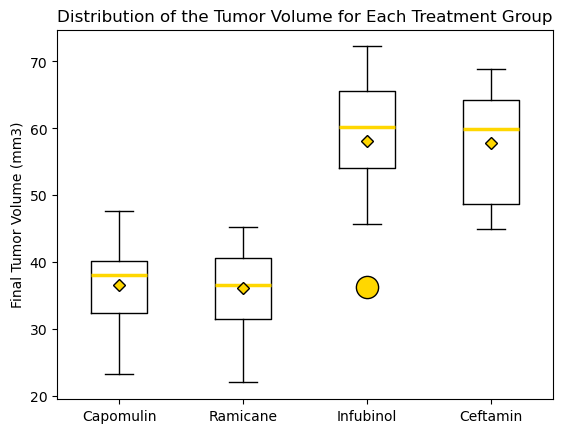

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#customize the outliers
flierprops = dict(marker= "o", markerfacecolor="gold" , markersize=16, 
                  markeredgecolor="black") 
#customize the median line 
medianprops = dict(linestyle= "-" , linewidth=2.5, color= "gold")
#customized the mean 
meanpointprops = dict(marker="D" , markeredgecolor="black", 
                      markerfacecolor="gold")
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=flierprops, medianprops=medianprops, meanprops=meanpointprops,
            showmeans=True)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distribution of the Tumor Volume for Each Treatment Group")
plt.show() 


## Line and Scatter Plots

In [17]:
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [18]:
capomulinDF = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capomulinDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [21]:
data_l509 = capomulinDF.loc[capomulinDF["Mouse ID"] == "l509"]
data_l509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


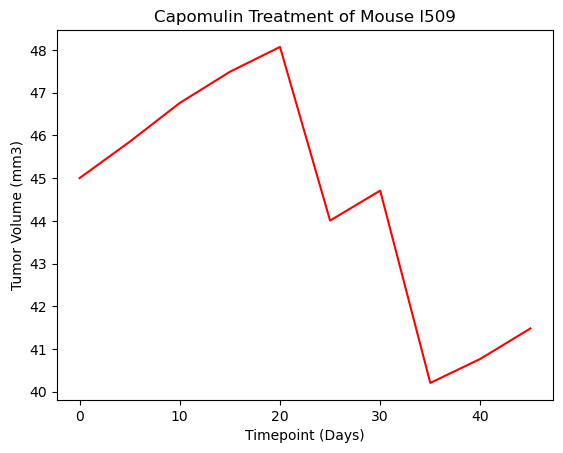

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin - we need the timepoint(x) and tumor volume columns(y) 
plt.plot(data_l509["Timepoint"], 
         data_l509["Tumor Volume (mm3)"],
         color="red")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)") 
plt.show()

In [23]:
#group by the Mouse ID and take the means 
capomulin_AveragesDF = capomulinDF.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
capomulin_AveragesDF.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


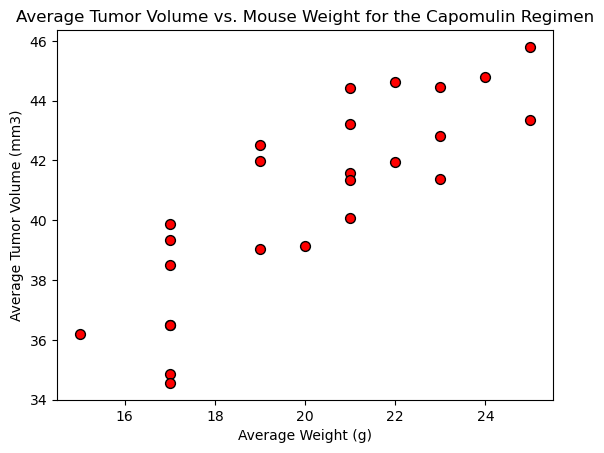

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(
    capomulin_AveragesDF["Weight (g)"], 
    capomulin_AveragesDF["Tumor Volume (mm3)"],
    facecolor="red",
    edgecolor="black",
    s=50 
)
plt.xlabel("Average Weight (g)") 
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")

plt.show()

## Correlation and Regression

In [51]:
corr = st.pearsonr(capomulin_AveragesDF["Weight (g)"],capomulin_AveragesDF["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and the average tumor volume is {corr: .2f}")

The correlation between mouse weight and the average tumor volume is  0.84


In [52]:
y_values = capomulin_AveragesDF["Weight (g)"]
x_values = capomulin_AveragesDF["Tumor Volume (mm3)"]


In [55]:
model= st.linregress(capomulin_AveragesDF["Weight (g)"],
                                                           capomulin_AveragesDF["Tumor Volume (mm3)"]) 
regress_values = y_values * model[0] + model[1]
#regressValue = x_values = slope + intercept 
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

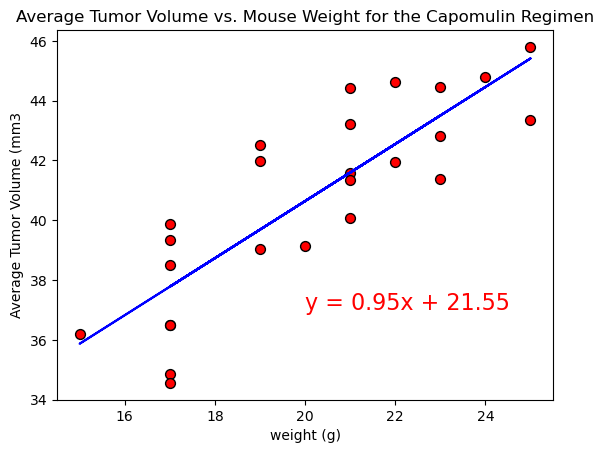

In [58]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(y_values,x_values,  facecolor="red",edgecolor="black", s=50)

plt.plot(y_values, regress_values, "b") 
plt.annotate(lineEQ, (20, 37), fontsize=16, color="red") 

plt.xlabel("weight (g)")
plt.ylabel("Average Tumor Volume (mm3")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.show()
